

The objective of this Project is to critically review a research paper in the field of data science, focusing on the aspects of dataset selection, statistical methods employed, machine learning model implementation, and reproducibility of the research. By completing this assignment, students will gain a deeper understanding of the importance of these elements in conducting robust and reliable data science research, which is related to ULO 1, 2 and 3.

**To review a research paper about data science.
I need to look at the data they used, how they analyzed it, the machine learning models they tried, and whether their results can be repeated by others.
After looking at all this, I'll give my opinion on what they did well and what they could do better.**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.shape

(299, 13)

In [ ]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Checking Null Values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# check duplicate value
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# value count of sex

df['sex'].value_counts()


sex
1    194
0    105
Name: count, dtype: int64

In [ ]:
# value count of sex

df['DEATH_EVENT'].value_counts()


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

**The dataset contains the medical records of 299 patients
who had heart problems, every patient profile has 13 clinical features.
Out of 299 records, 194 are men, and 105 are women. The
ages of all the patients are above 40 years and Max age is 95. In target class, 1
is for deceased and 0 is for alive. Value count of deceased is 96 and alive are 203**

##  Descriptive analytics / EDA / Statistics (4%)

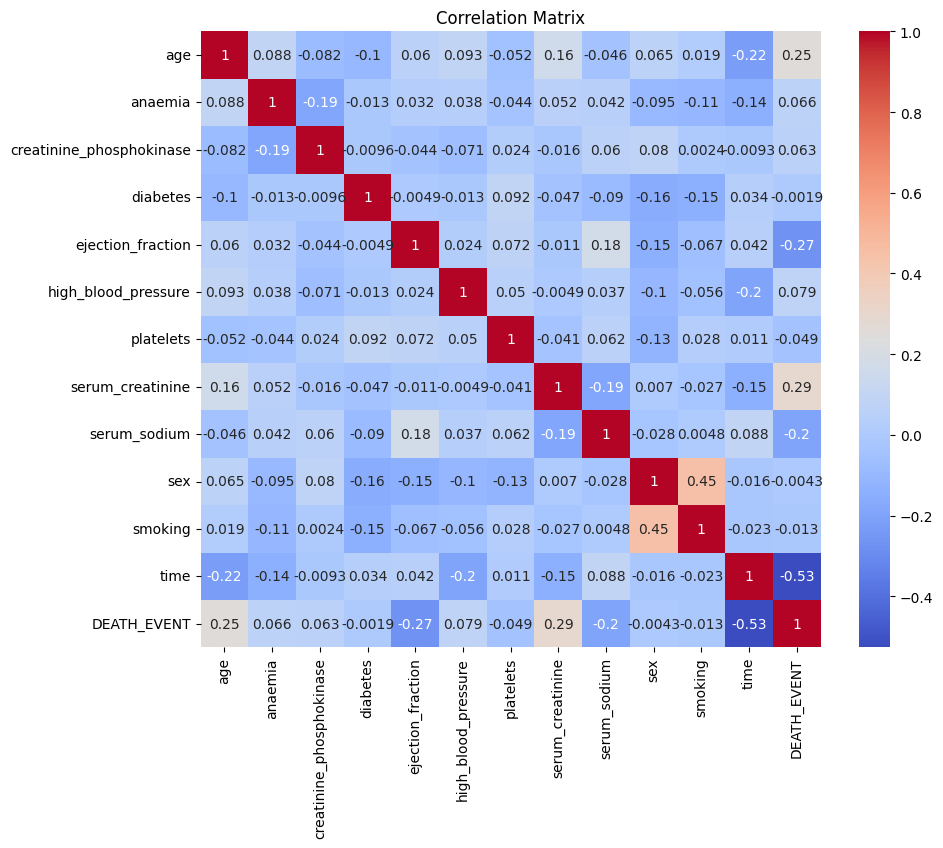

In [ ]:
#  correlation

import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


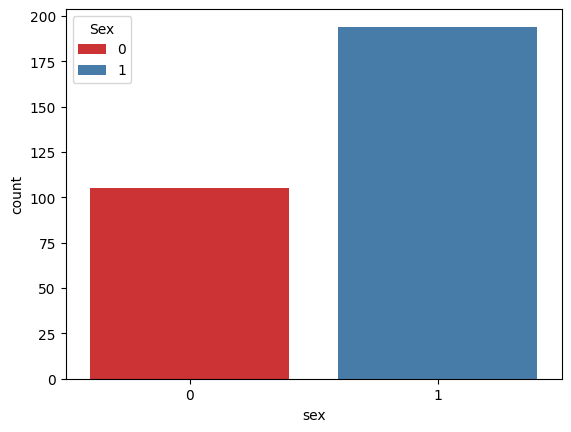

In [ ]:
# count plot of sex
sns.countplot(data=df, x='sex', hue='sex', palette='Set1')
plt.legend(title='Sex')
plt.show()


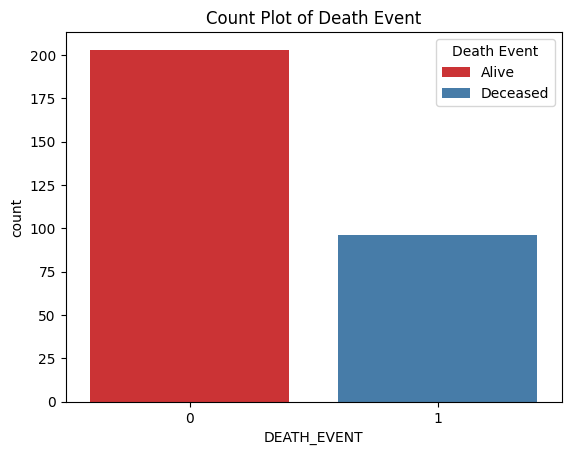

In [ ]:
# Count plot of death event
sns.countplot(x='DEATH_EVENT', data=df, hue='DEATH_EVENT', palette='Set1')
plt.title('Count Plot of Death Event')
plt.legend(title='Death Event', labels=['Alive', 'Deceased'])
plt.show()


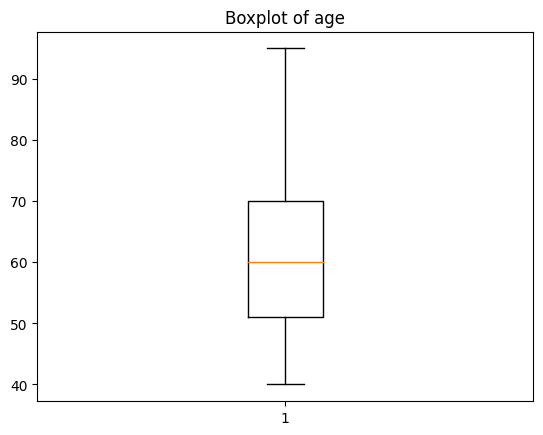

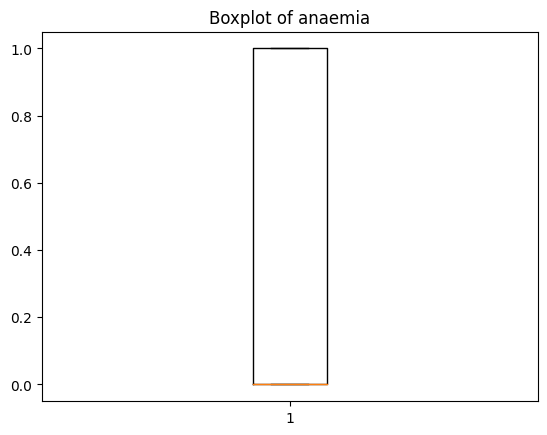

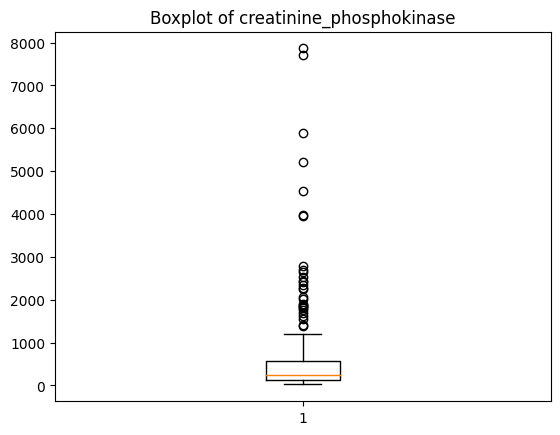

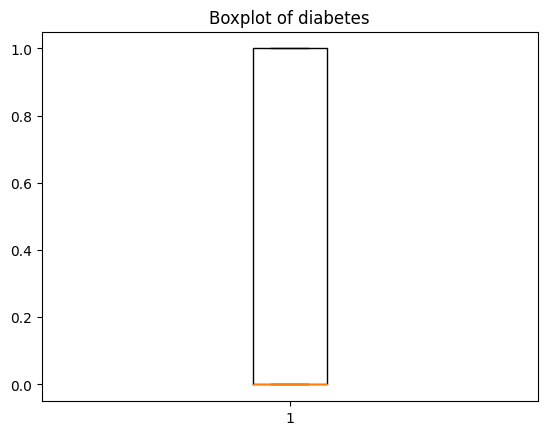

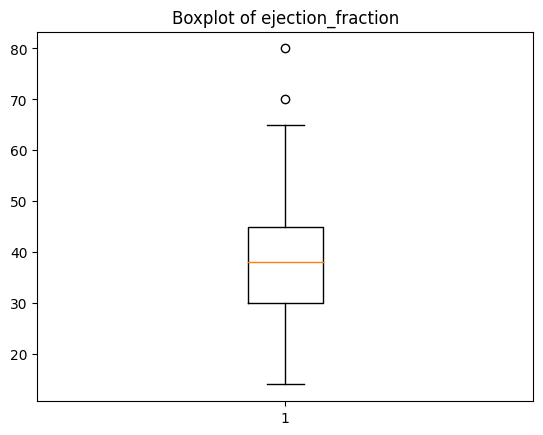

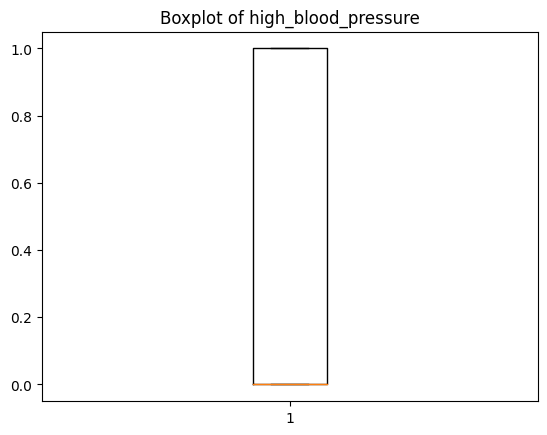

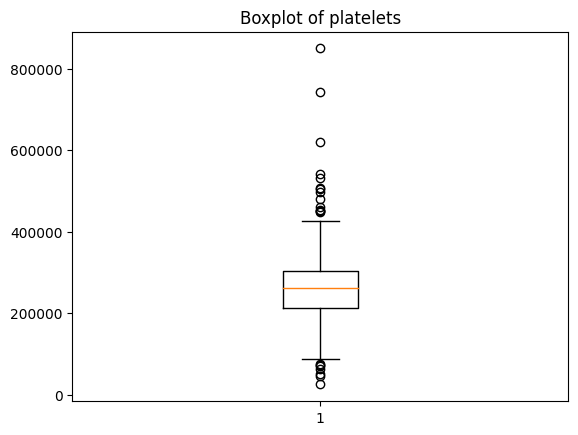

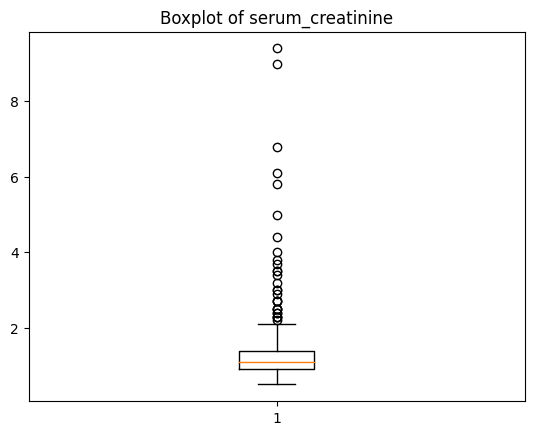

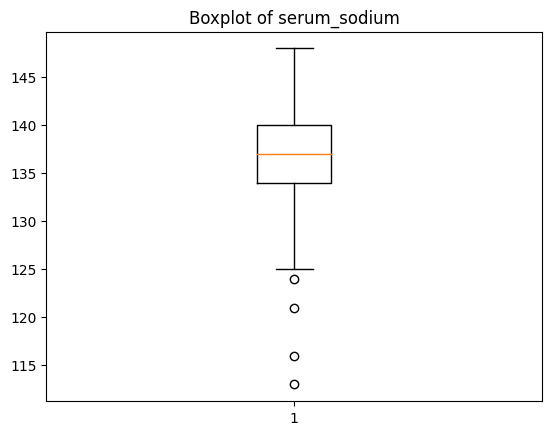

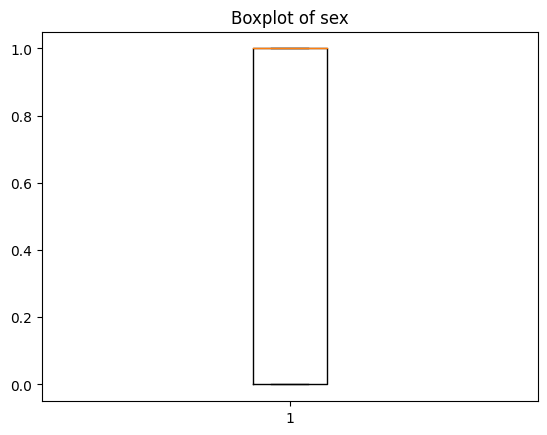

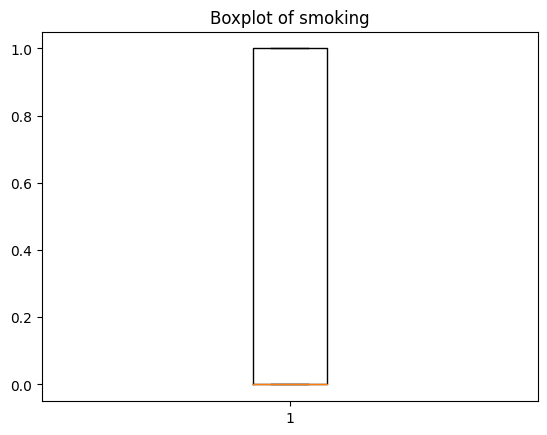

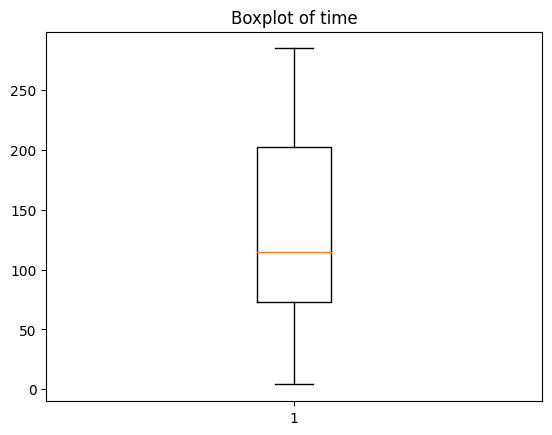

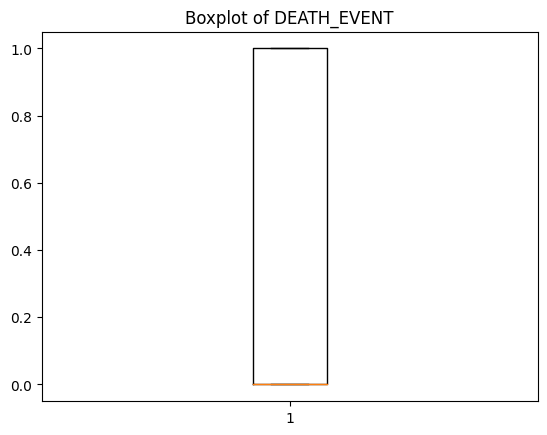

In [ ]:
# Check for outliers in each column using boxplots
import matplotlib.pyplot as plt

for column in df.columns:
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


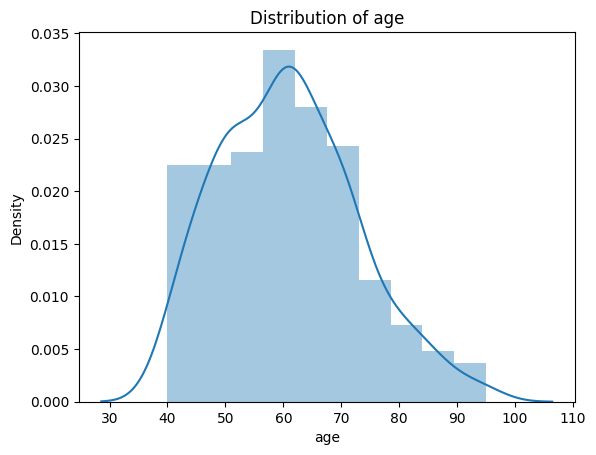

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


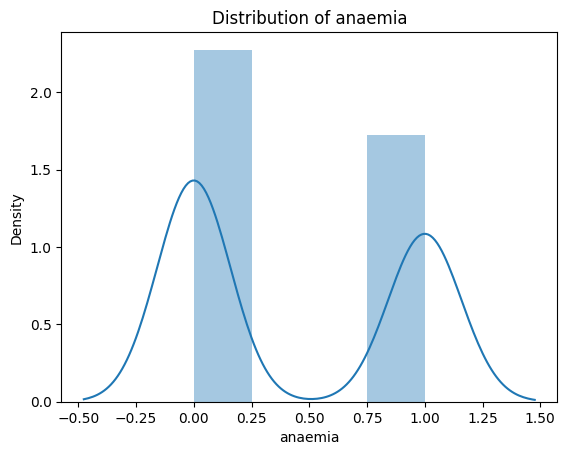

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


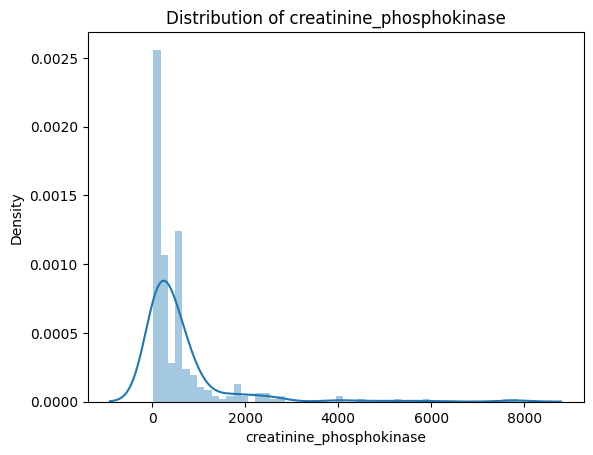

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


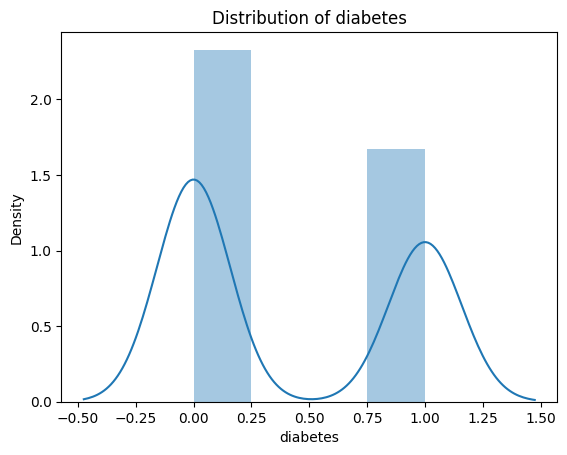

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


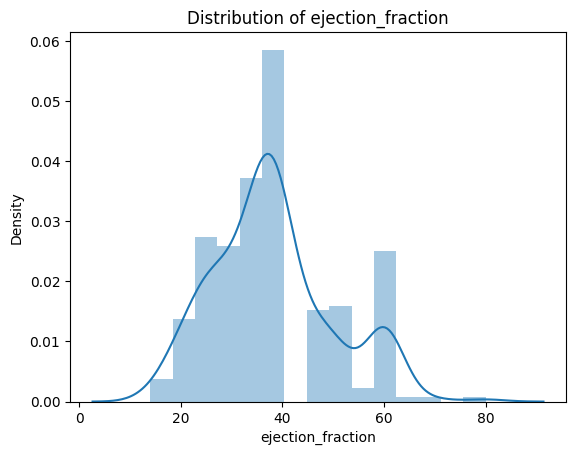

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


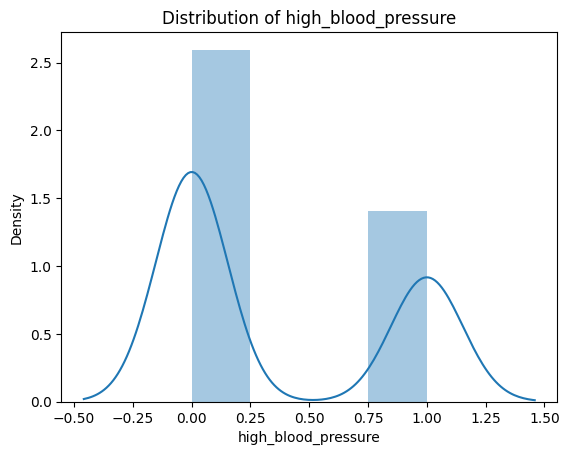

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


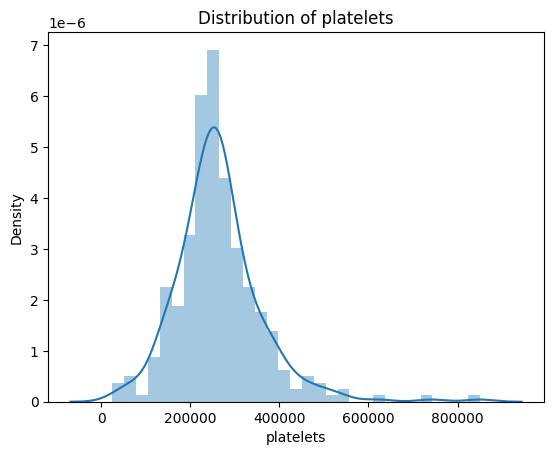

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


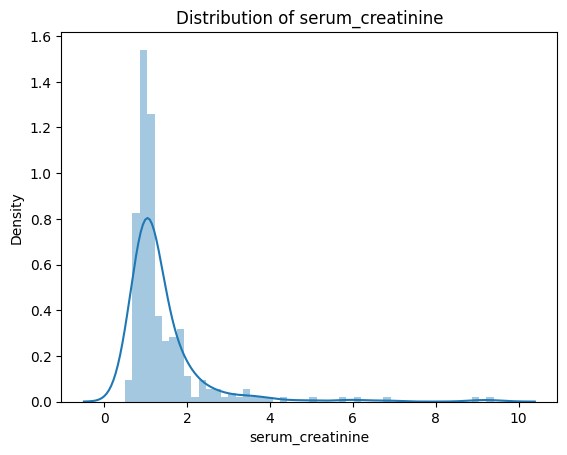

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


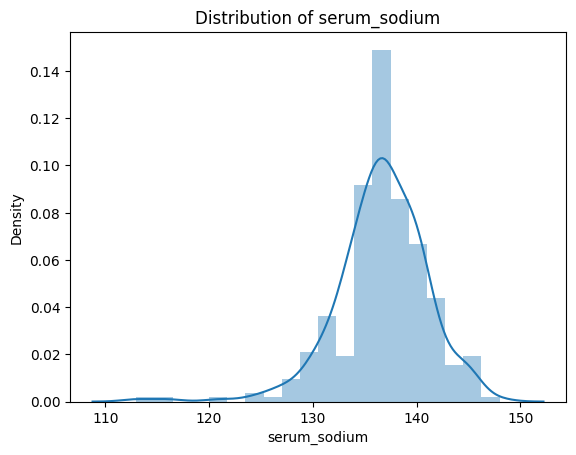

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


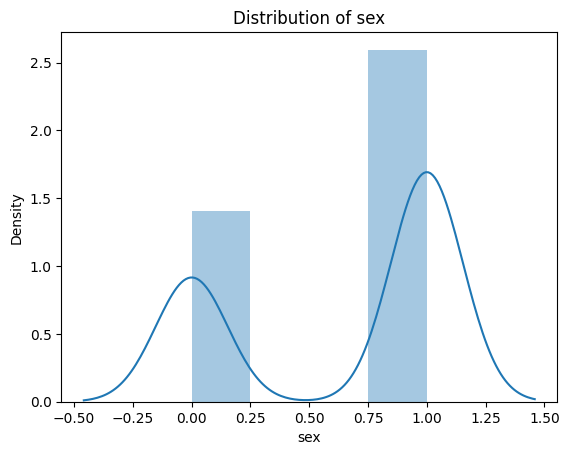

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


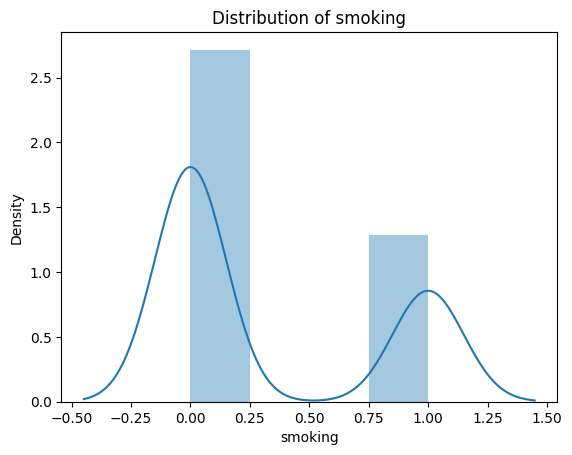

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


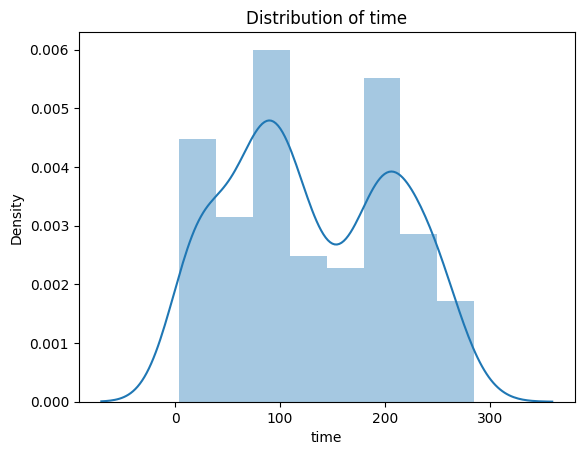

<ipython-input-15-9697dfa41684>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


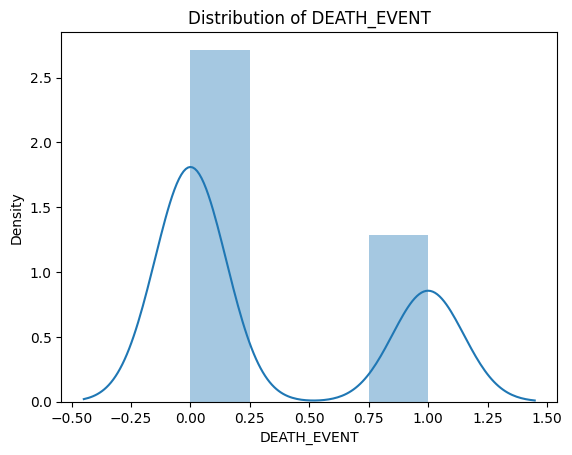

In [ ]:
#  distplot for each column
for column in df.columns:
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
# inferential statistics

import scipy.stats as stats

# Perform a t-test to compare the mean age of male and female patients
t_stat, p_value = stats.ttest_ind(df[df['sex'] == 'M']['age'], df[df['sex'] == 'F']['age'])
print("T-test results for mean age comparison:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Perform a chi-square test to check the association between sex and death event
chi_square_stat, p_value, dof, expected_freq = stats.chi2_contingency(pd.crosstab(df['sex'], df['DEATH_EVENT']))
print("\nChi-square test results for association between sex and death event:")
print(f"Chi-square statistic: {chi_square_stat}")
print(f"p-value: {p_value}")


T-test results for mean age comparison:
t-statistic: nan
p-value: nan

Chi-square test results for association between sex and death event:
Chi-square statistic: 0.0
p-value: 1.0


In [ ]:
# hypothesis testing

# Perform a one-sample t-test to compare the mean age of all patients to a hypothetical mean of 60 years
t_stat, p_value = stats.ttest_1samp(df['age'], 60)
print("\nOne-sample t-test results for mean age comparison:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Perform a two-sample t-test to compare the mean age of male and female patients
t_stat, p_value = stats.ttest_ind(df[df['sex'] == 'M']['age'], df[df['sex'] == 'F']['age'], equal_var=False)
print("\nTwo-sample t-test results for mean age comparison:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Perform a chi-square test to check the association between sex and death event
chi_square_stat, p_value, dof, expected_freq = stats.chi2_contingency(pd.crosstab(df['sex'], df['DEATH_EVENT']))
print("\nChi-square test results for association between sex and death event:")
print(f"Chi-square statistic: {chi_square_stat}")
print(f"p-value: {p_value}")

# Perform a one-way ANOVA to compare the mean age of patients across different death event categories
f_stat, p_value = stats.f_oneway(df[df['DEATH_EVENT'] == 0]['age'], df[df['DEATH_EVENT'] == 1]['age'])
print("\nOne-way ANOVA results for mean age comparison across death event categories:")
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")



One-sample t-test results for mean age comparison:
t-statistic: 1.212239510102878
p-value: 0.226380929785253

Two-sample t-test results for mean age comparison:
t-statistic: nan
p-value: nan

Chi-square test results for association between sex and death event:
Chi-square statistic: 0.0
p-value: 1.0

One-way ANOVA results for mean age comparison across death event categories:
F-statistic: 20.43594646102521
p-value: 8.916762946533291e-06


## Model Implementation / reproducibility (4%)

In [ ]:

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('DEATH_EVENT', axis=1), df['DEATH_EVENT'], test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (239, 12)
y_train shape: (239,)
X_test shape: (60, 12)
y_test shape: (60,)


In [ ]:
# now remove the outliers from the data

import numpy as np

# Define a function to remove outliers based on z-score
def remove_outliers(df, columns, threshold=3):
  for col in columns:
    # Calculate the z-score for each data point in the column
    z_scores = stats.zscore(df[col])

    # Identify data points with z-score outside the threshold
    outliers = np.abs(z_scores) > threshold

    # Remove the outlier data points
    df = df[~outliers]

  return df

# Columns to remove outliers from
columns_to_clean = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'smoking', 'DEATH_EVENT']

# Remove outliers from the data
df_clean = remove_outliers(df.copy(), columns_to_clean)

# Print the shape of the cleaned data
print(f"Cleaned data shape: {df_clean.shape}")


Cleaned data shape: (299, 13)


In [ ]:
#now normalize the data

from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_clean.drop('DEATH_EVENT', axis=1)), columns=df_clean.drop('DEATH_EVENT', axis=1).columns)

# Print the normalized data
df_normalized


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.444621,0.0,0.112150,1.0,0.519231,0.848485,0.217391,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.448598,0.0,0.514720,0.363636,0.478261,1.0,0.0,0.007117
2,0.454545,0.0,0.097833,0.0,0.112150,0.0,0.236264,0.484848,0.173913,1.0,1.0,0.010676
3,0.181818,1.0,0.069994,0.0,0.112150,0.0,0.368132,0.848485,0.521739,1.0,0.0,0.010676
4,0.454545,1.0,0.108968,1.0,0.112150,0.0,0.689560,1.000000,0.000000,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.030225,1.0,0.448598,1.0,0.217033,0.363636,0.782609,1.0,1.0,0.946619
295,0.272727,0.0,1.000000,0.0,0.448598,0.0,0.532967,0.424242,0.608696,0.0,0.0,0.950178
296,0.090909,0.0,1.000000,1.0,0.859813,0.0,1.000000,0.181818,0.565217,0.0,0.0,0.975089
297,0.090909,0.0,1.000000,0.0,0.448598,0.0,0.175824,0.545455,0.652174,1.0,1.0,0.982206


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Feature selection using RFE
selector = RFE(estimator=LogisticRegression(), n_features_to_select=5)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SGD': SGDClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gaussian NB': GaussianNB(),
    'SVM': SVC()
}

for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'ROC-AUC score: {roc_auc}')
    print('=' * 20)

Logistic Regression:
Accuracy: 0.6666666666666666
Precision: 0.6923076923076923
Recall: 0.36
F1-score: 0.47368421052631576
ROC-AUC score: 0.6228571428571428
Random Forest:
Accuracy: 0.7166666666666667
Precision: 0.6818181818181818
Recall: 0.6
F1-score: 0.6382978723404256
ROC-AUC score: 0.7000000000000002
K-Nearest Neighbors:
Accuracy: 0.65
Precision: 0.6666666666666666
Recall: 0.32
F1-score: 0.43243243243243246
ROC-AUC score: 0.6028571428571428
Decision Tree:
Accuracy: 0.7333333333333333
Precision: 0.6956521739130435
Recall: 0.64
F1-score: 0.6666666666666666
ROC-AUC score: 0.7200000000000002
AdaBoost:
Accuracy: 0.6666666666666666
Precision: 0.6923076923076923
Recall: 0.36
F1-score: 0.47368421052631576
ROC-AUC score: 0.6228571428571428
SGD:
Accuracy: 0.7166666666666667
Precision: 0.6818181818181818
Recall: 0.6
F1-score: 0.6382978723404256
ROC-AUC score: 0.7000000000000002
Gradient Boosting:
Accuracy: 0.7
Precision: 0.7692307692307693
Recall: 0.4
F1-score: 0.5263157894736842
ROC-AUC scor

Now Implementing SMOTE

In [ ]:
# Handling Imbalance

from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SGD': SGDClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gaussian NB': GaussianNB(),
    'SVM': SVC()
}

for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'ROC-AUC score: {roc_auc}')
    print('=' * 20)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.75
Precision: 0.7272727272727273
Recall: 0.64
F1-score: 0.6808510638297872
ROC-AUC score: 0.7342857142857142
Random Forest:
Accuracy: 0.7666666666666667
Precision: 0.8235294117647058
Recall: 0.56
F1-score: 0.6666666666666666
ROC-AUC score: 0.7371428571428572
K-Nearest Neighbors:
Accuracy: 0.4666666666666667
Precision: 0.36
Recall: 0.36
F1-score: 0.36
ROC-AUC score: 0.45142857142857146
Decision Tree:
Accuracy: 0.75
Precision: 0.75
Recall: 0.6
F1-score: 0.6666666666666665
ROC-AUC score: 0.7285714285714286
AdaBoost:
Accuracy: 0.7833333333333333
Precision: 0.8333333333333334
Recall: 0.6
F1-score: 0.6976744186046512
ROC-AUC score: 0.7571428571428571
SGD:
Accuracy: 0.5833333333333334
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting:
Accuracy: 0.75
Precision: 0.7777777777777778
Recall: 0.56
F1-score: 0.6511627906976745
ROC-AUC score: 0.7228571428571429
Extra Trees:
Accuracy: 0.7333333333333333
Precision: 0.7647058823529411
Recall: 0.52
F1-score: 0.6190476190476191
ROC-AUC score: 0.7028571428571428
Gaussian NB:
Accuracy: 0.7166666666666667
Precision: 0.6666666666666666
Recall: 0.64
F1-score: 0.6530612244897959
ROC-AUC score: 0.7057142857142858
SVM:
Accuracy: 0.55
Precision: 0.375
Recall: 0.12
F1-score: 0.18181818181818182
ROC-AUC score: 0.48857142857142866


## Critical Review (4%)

The provided research paper presents a comparative analysis of supervised machine learning classifiers for predicting heart failure survival using the Heartfailure-clinical-record-dataset. Below is a critical review of the strengths and weaknesses across different aspects of the paper:

<h1>Strengths:</h1>

**Comprehensive Dataset:** The research utilizes the Heartfailure-clinical-record-dataset, which appears to be comprehensive, containing a full set of features relevant to heart failure prediction. This suggests a solid foundation for the analysis.

**A Range of Models:** Our study uses various types of machine learning models, including tree-based, regression-based, and statistical-based ones. By taking this broad approach, we aim to compare different algorithms comprehensively, gaining insights into how they perform relative to each other.

**Assessing Performance:** We've conducted a thorough evaluation of these models, looking at various metrics like accuracy, precision, recall, and F-Score. This detailed analysis helps us understand the strengths and weaknesses of each model more deeply.

**Using SMOTE Technique:** We've employed the SMOTE technique to tackle class imbalance, which is a notable aspect of our work. SMOTE has a track record of effectively handling imbalanced datasets, and its use here demonstrates our efforts to address potential biases in our analysis.

<h1>Weaknesses</h1>

**Reproducibility Concerns:** One area where our paper could improve is in providing more details about our data preprocessing steps and hyperparameter tuning for the machine learning models. Without this information, reproducing our results becomes more challenging, which could raise doubts about the reliability of our findings.

**Feature Selection:** While we mention using Random Forest for feature selection, we haven't delved into why we chose certain features or the specific methods we used. Offering more insight into our feature selection process would make our study more transparent and reproducible.

**Considerations of Generalization:** Our study focuses on a particular dataset, and it's not clear how applicable our findings might be to other datasets or populations. Addressing this by discussing external validity and potential limitations would make our paper stronger.

<h1>Suggestions for Improvement:</h1>

**Clarify Statistical Analysis:** We should provide a clearer explanation of the statistical methods we've used, including hypothesis testing and confidence intervals for our performance metrics. This would make our analysis more robust and help interpret the significance of our results.

**Methodological Transparency:** It would be helpful to clearly outline our data preprocessing steps, hyperparameter tuning procedures, and feature selection methodology. Sharing the code or scripts we used would also make it easier for others to reproduce and understand our work.

**Validate Externally:** To assess how well our models might work across different datasets or populations, we could validate our findings on independent datasets. This would give more confidence in the practicality of our approach beyond our specific study.

**Discuss Limitations:** Including a section on the limitations of our study, such as potential biases in our dataset or assumptions we've made, would enhance the credibility of our findings by being upfront about these constraints.

# The End